In this notebook, we will attempt to create an unsupervised machine learning model that divides customers into segments. We will use the "Customer Personality Analysis", uploaded by Akash Patel on Kaggle. The dataset comprehends both demographic and behavioural data of food and groceries customers.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans


In [179]:
#Load and display the dataset
data = pd.read_csv('customers.csv')
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Living_Status,Children
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,2
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,1,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,1


In [81]:
data.shape

(2216, 19)

The dataset has 2216 rows and 19 columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

All of the variables are already numeric, so we won't need to do any encoding.

In [6]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Living_Status,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.611011,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,607.075361,0.645307,0.947202
std,0.683469,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,602.900476,0.478528,0.749062
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,69.000000,0.000000,0.000000
50%,0.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,396.500000,1.000000,1.000000
75%,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1048.000000,1.000000,1.000000
max,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,2525.000000,1.000000,3.000000


The dataset has been already pre-processed and checked for duplicates, and the ID number of customers have been already removed.

Text(0.5, 1.0, 'Total Missing Values')

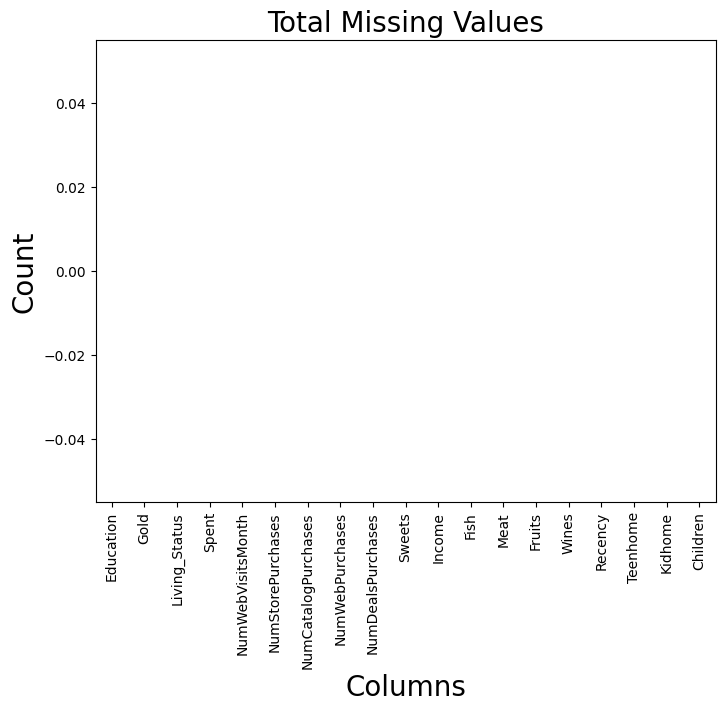

In [9]:
#Check for missing valus
total_missing = data.isnull().sum().sort_values(ascending=False)
total_missing_select = total_missing.head(20)
total_missing_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

The dataset doesn't have any missing value.

Now we need to scale the data, since clustering to facilitate unsupervised learning.

In [180]:
SS = StandardScaler()
X = SS.fit(data).transform(data)

Now let's use principal component analysis to reduce the dimensionality of the dataset.
Instead of selecting the number of components we want, we can select the number of components that explains X percentage of variance in the data.


In [210]:
pca = PCA(n_components=0.90)
data_reduced_90 = pca.fit(X).transform(X)
print(data_reduced_90)

[[ 4.37087708 -0.14935608  1.28473322 ...  0.65402161 -1.9705995
   0.26243959]
 [-2.80221525  0.08352142  1.23084728 ... -0.20123636 -0.28528302
   0.08540838]
 [ 2.13120362 -0.60249226 -0.43416404 ... -0.36712122  1.06704174
  -0.10107902]
 ...
 [ 2.00342576 -0.77481147  0.18742393 ... -0.14272809  0.96128803
  -1.85739182]
 [ 1.85481041  0.87533247 -1.26277127 ...  0.05957224  0.31445245
  -0.1067685 ]
 [-2.42474483  0.99957645 -0.18801565 ... -0.38248441 -0.16852365
   0.08985573]]


Alternatively, in n_compontents, we could have specified 'mle' (maximum likelihood estimation). In that case, PCA would have automatically selected the number of components that captured enough variance to explain the data based on a likelihood-based criterion.

Let's plot the ranking of features to see what feeatures contribute to the most to the variance.

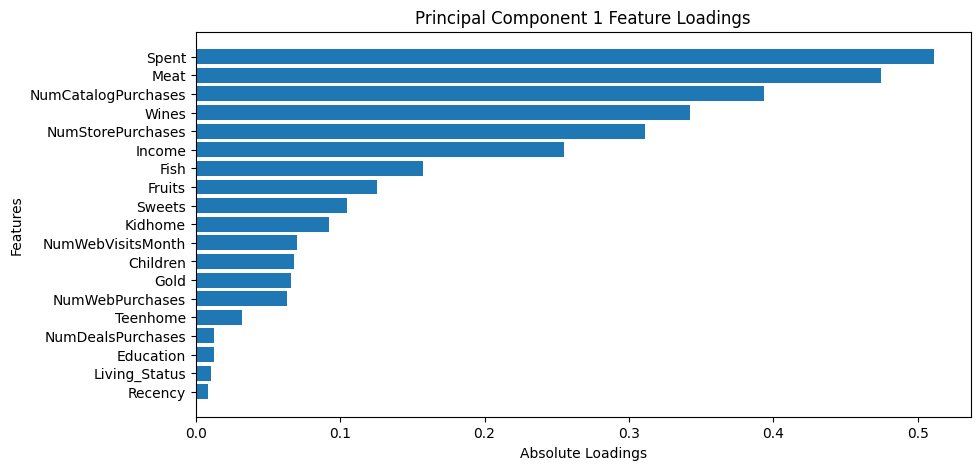

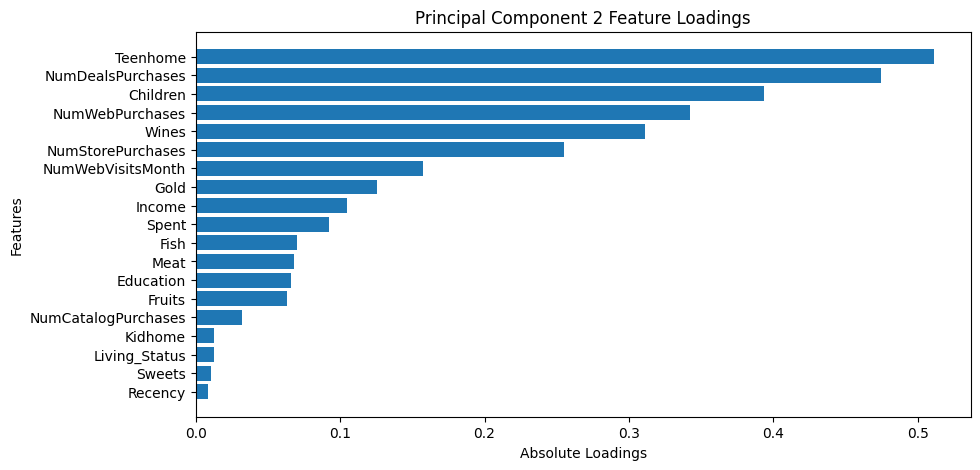

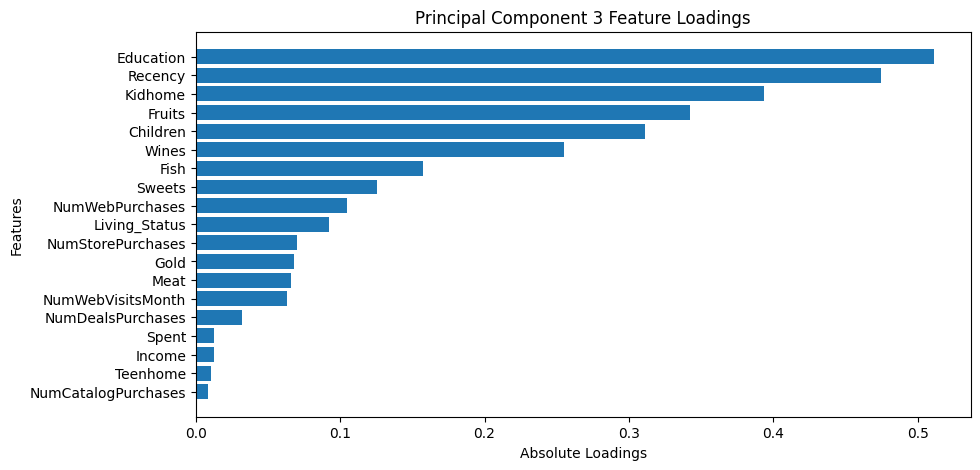

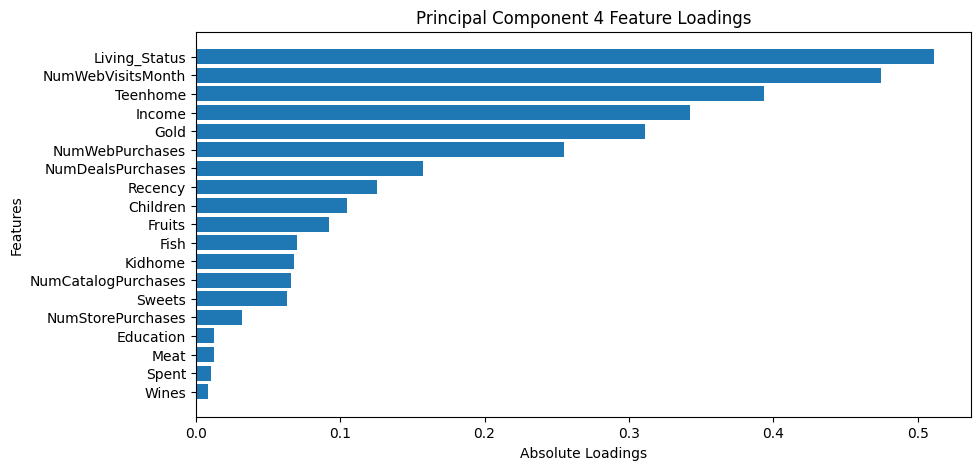

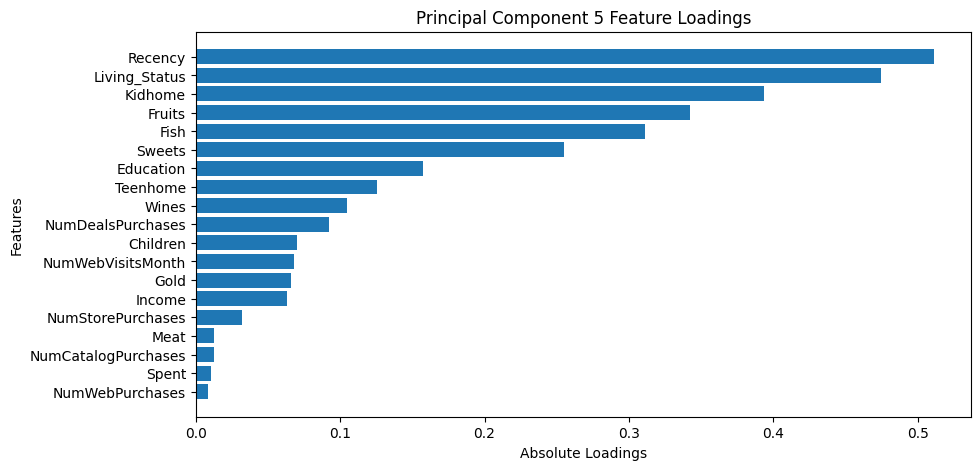

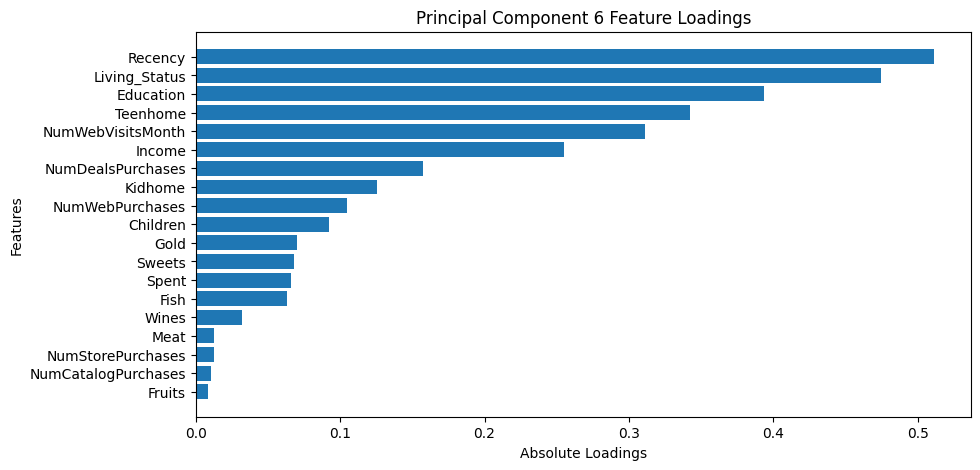

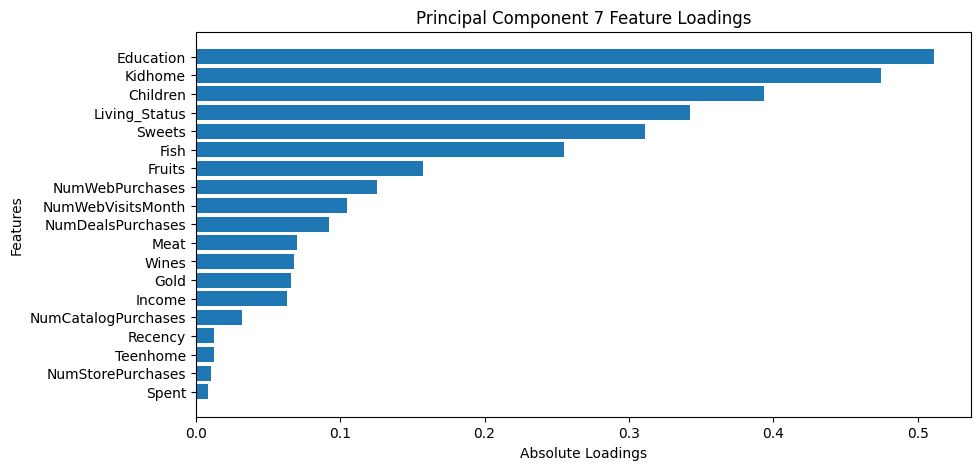

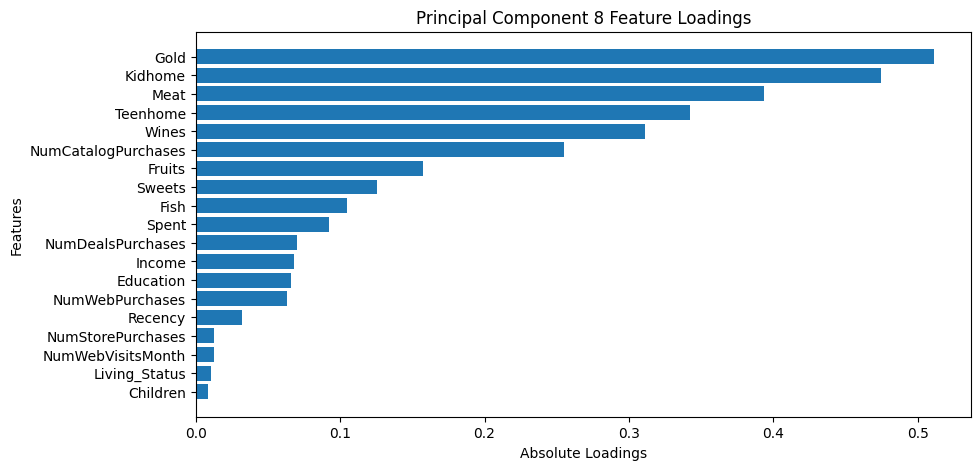

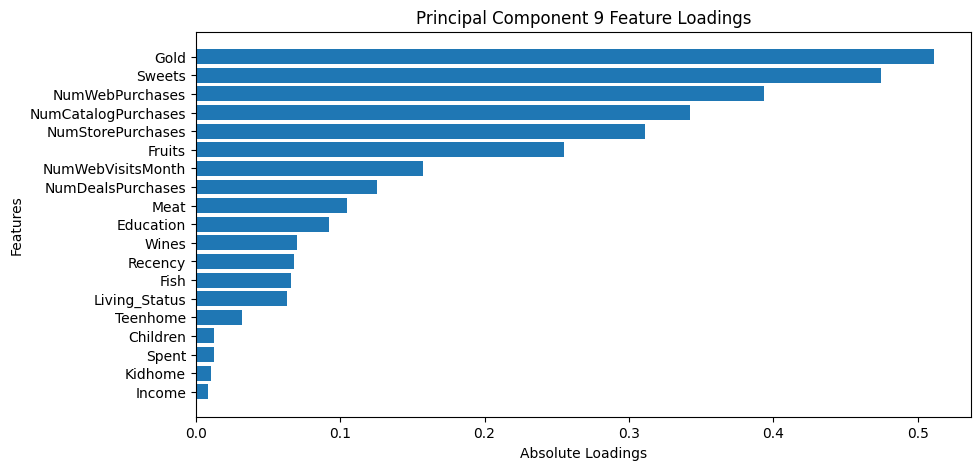

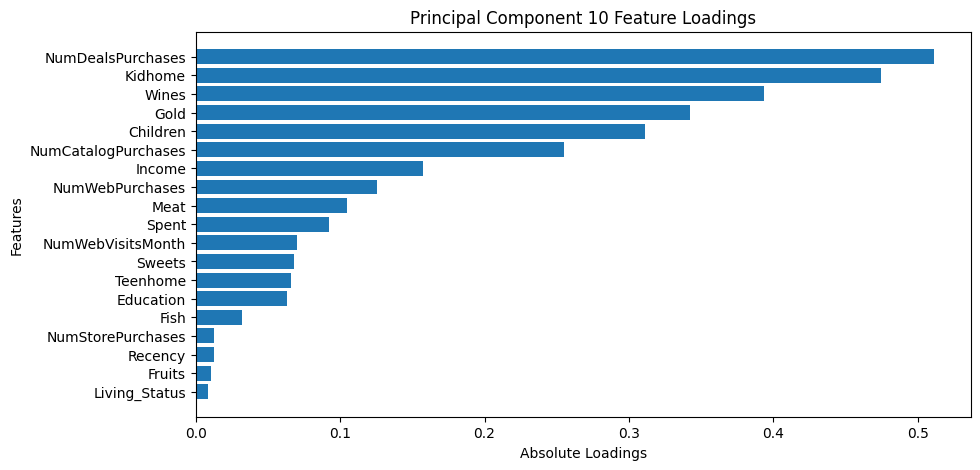

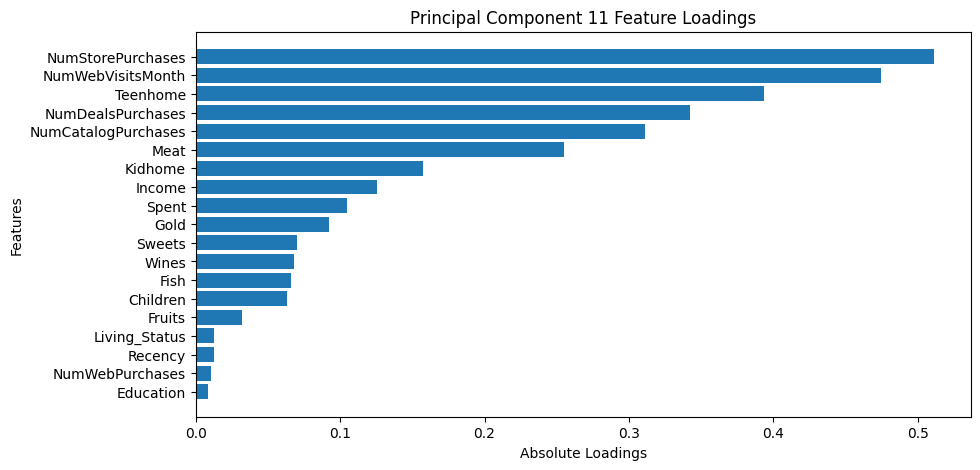

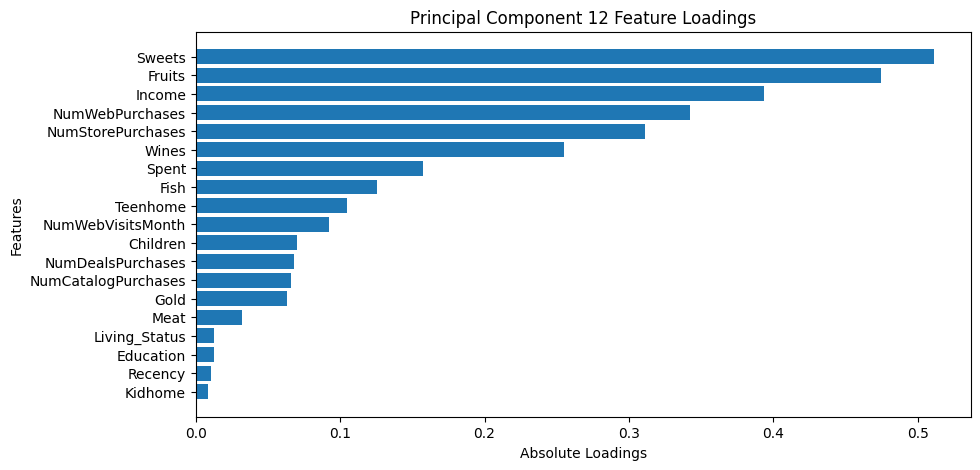

In [85]:
# Get the absolute loadings from the PCA object
abs_loadings = np.abs(pca.components_)

# Create a list of feature names
feature_names = data.columns.tolist()

# Create a ranking of features based on loadings for each principal component
ranking_per_component = []
for component_loadings in abs_loadings:
    component_ranking = [feature_names[i] for i in np.argsort(component_loadings)[::-1]]
    ranking_per_component.append(component_ranking)

# Plot or display the ranking of features for each principal component
for i, component_ranking in enumerate(ranking_per_component):
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(component_ranking)), component_loadings[np.argsort(component_loadings)[::-1]])
    plt.yticks(range(len(component_ranking)), component_ranking)
    plt.title(f"Principal Component {i+1} Feature Loadings")
    plt.xlabel("Absolute Loadings")
    plt.ylabel("Features")
    plt.gca().invert_yaxis()  # Invert y-axis to display highest loading at the top
    plt.show()


Let's train our first model by using Gaussian Mixture, which is a soft clustering machine learning method used to determine the probability each data point belongs to a given cluster. The advantage of such soft cclustering methods over hard clustering, is that they output probabilities instead of none or nothing values (0-1) when elements are ouput as member or not member of certain clusters.

When we think about customers segmentation, we want to see what are the cluster of customers that are most likely to respond to a particular campaign, or product. Customers that are 90% likely to purchase will be different from customers that are only 70% likeli to do so, and they may be targeted with different campaigns.

Since 12 components explain 90% of the variance, let's select n_components=12

In [182]:
model = GaussianMixture(n_components=12, random_state=0)
model.fit(data_reduced_90)

GaussianMixture(n_components=12, random_state=0)

In [183]:
reduced_90_pred = model.predict(data_reduced_90)

To help interpretability and reduce the computational cost of the model, let's plot the clusters in 3D by using 3 principal compontents only, colored by predicted labels.

In [184]:
pca3 = PCA(n_components=3)
reduced_3_PCA = pca3.fit(X).transform(X)
mod = GaussianMixture(n_components=4, random_state=0)
PCA_3_pred = mod.fit(reduced_3_PCA).predict(reduced_3_PCA)

Text(0.5, 0.92, '3D projection of the clusters')

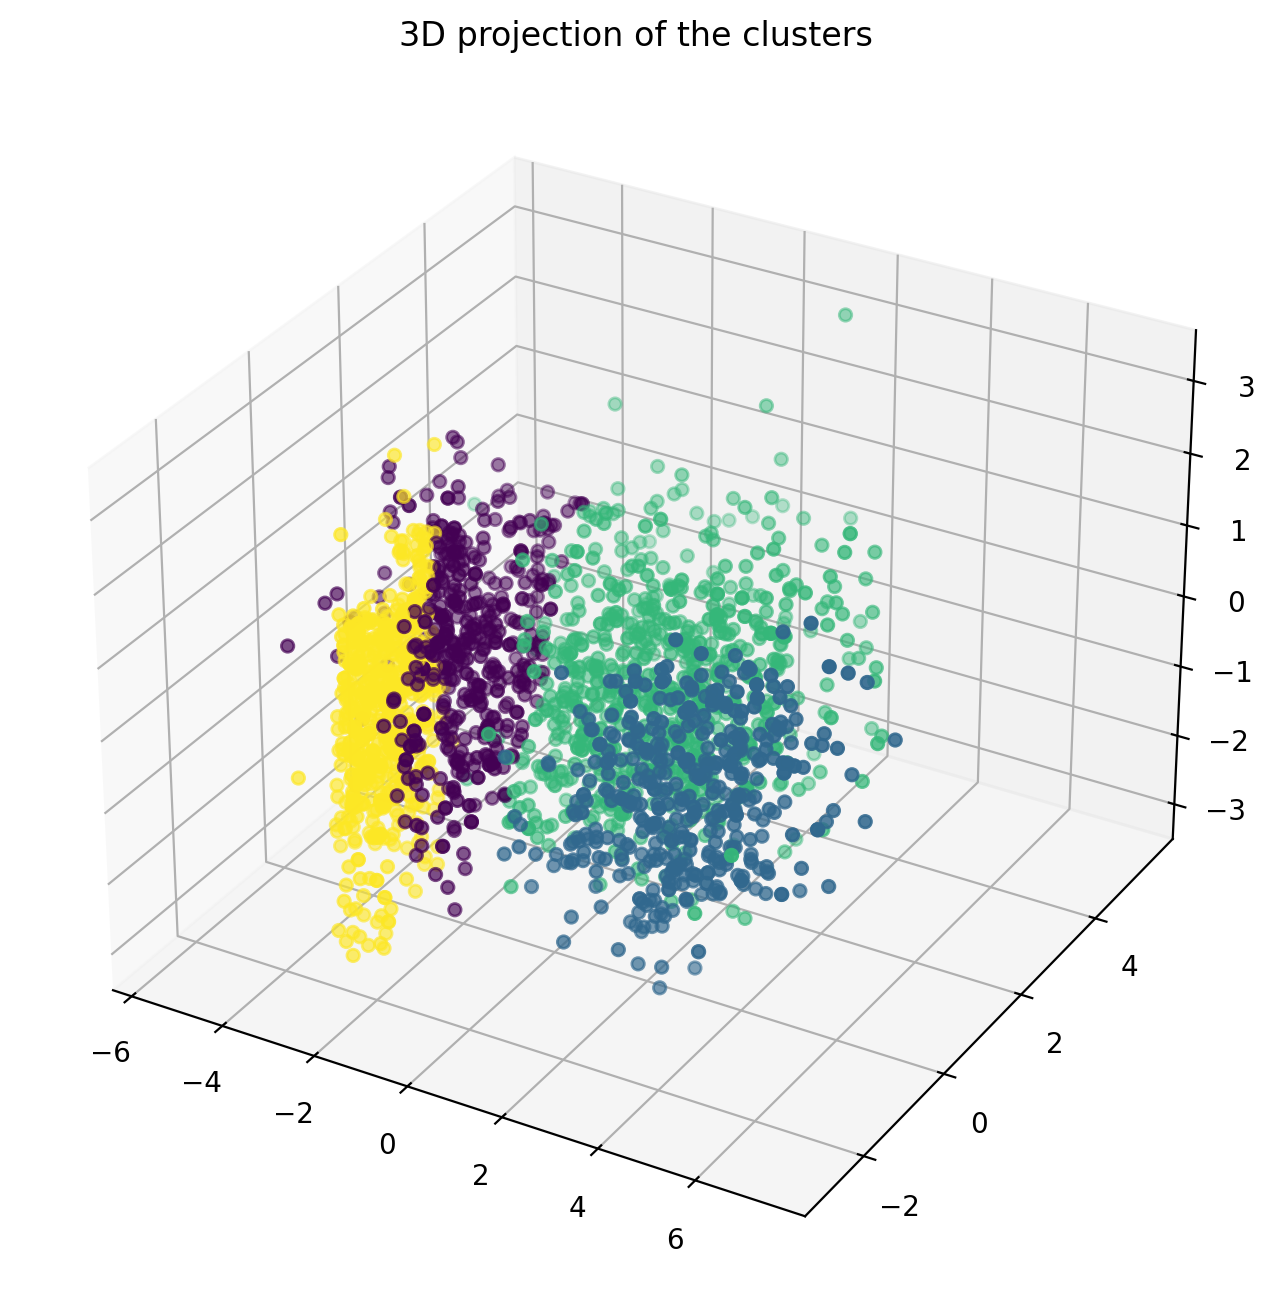

In [185]:
reduced_3_PCA = pd.DataFrame(reduced_3_PCA, columns=(['PCA 1', 'PCA 2', 'PCA 3']))
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduced_3_PCA['PCA 1'],reduced_3_PCA['PCA 2'],reduced_3_PCA['PCA 3'], c=PCA_3_pred)
ax.set_title("3D projection of the clusters")

The dataset was divided into 4 clear clusters.

We can simplify our visualization even more by reducing the number of compontents to two.

In [186]:
pca2 = PCA(n_components=2)
reduced_2_PCA = pca2.fit(X).transform(X)

In [187]:
model = GaussianMixture(n_components=4, random_state=0)
model.fit(reduced_2_PCA)

GaussianMixture(n_components=4, random_state=0)

In [188]:
PCA_2_pred = model.predict(reduced_2_PCA)

Text(0, 0.5, 'PCA 2')

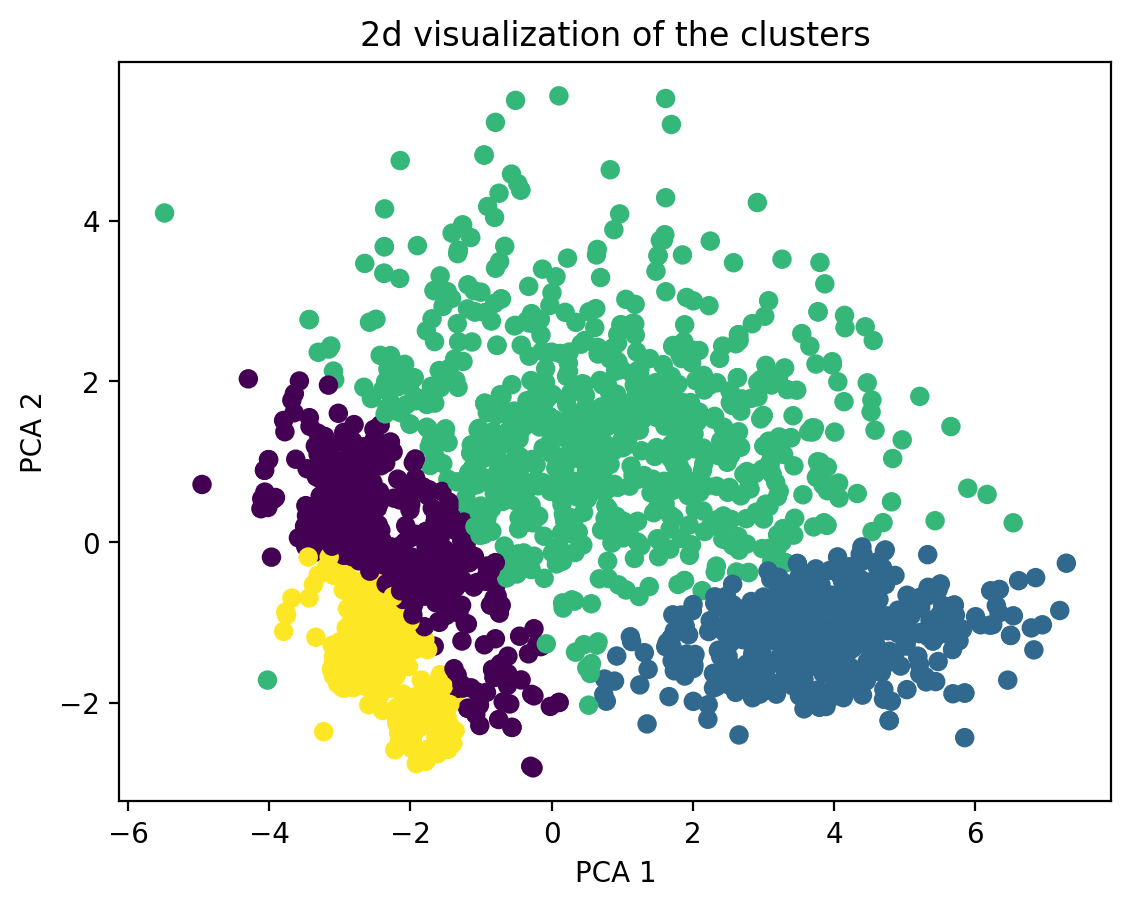

In [189]:
x = reduced_2_PCA[:,0]
y = reduced_2_PCA[:,1]
plt.scatter(x, y, c=PCA_2_pred)
plt.title("2d visualization of the clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

We can still see the 4 clusters in 2D.

Now that we've experimented with soft clustering, we can use hard clustering to see the difference.

Now that we have tried with Gaussian Mixture, let's try with a hard clustering algorithm: Mean Shift.

Before applying th Mean Shift algorithm on X we need to use the estimate_bandwidth function to estimate the bandwidth parameter.

In [192]:
bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data_reduced_90)

MeanShift(bandwidth=4.8535282658207395, bin_seeding=True)

With Mean Shift, we don't need to use the predict method because the algorithm assigns cluster labels directly during the fitting process. The labels_ attribute of the fitted model (in this case, ms) contains the cluster labels assigned to each data point.

Text(0, 0.5, 'PCA 2')

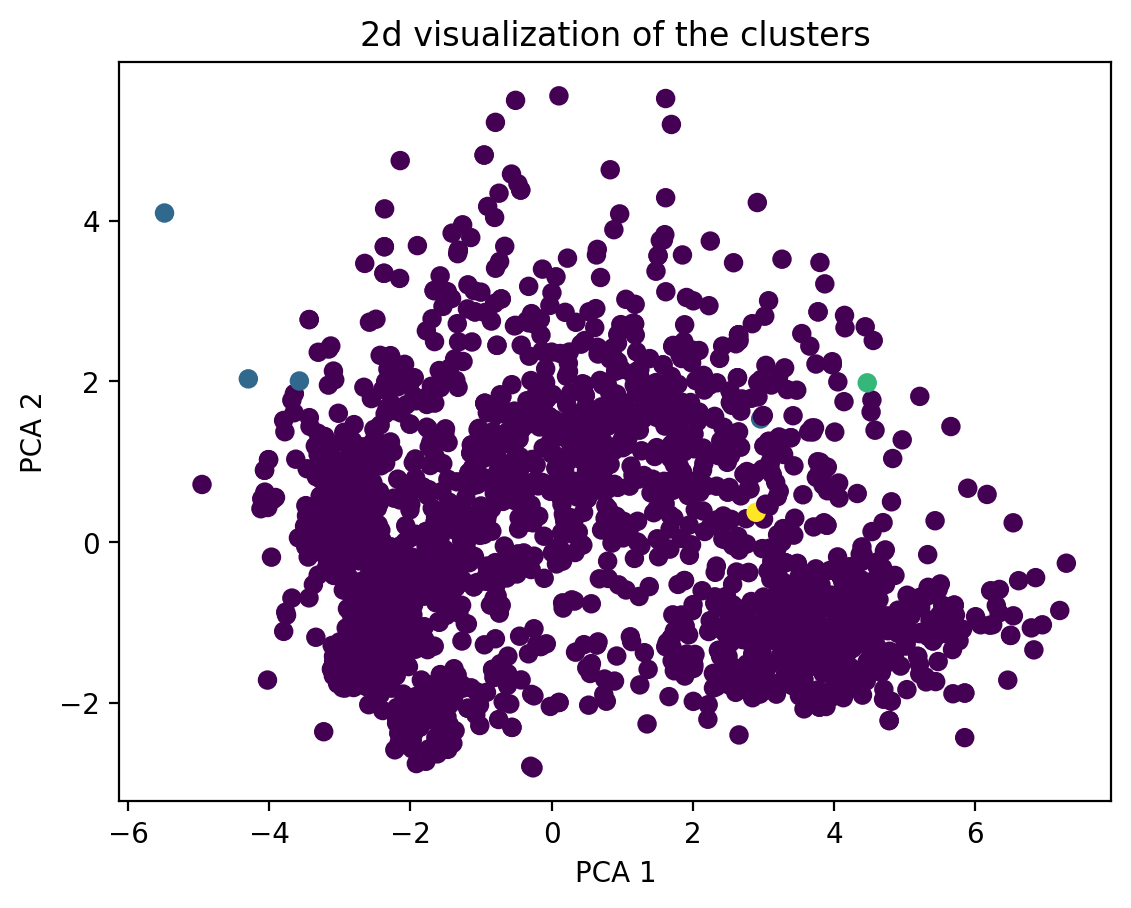

In [195]:
x = reduced_2_PCA[:,0]
y = reduced_2_PCA[:,1]
plt.scatter(x, y, c=ms.labels_)
plt.title("2d visualization of the clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

It looks like Mean Shift is not doing as a good job as Gaussian Mixture. We can confirm the poor performance by printing the labels.

In [194]:
print(ms.labels_)

[0 0 0 ... 0 0 0]


Obtaining an array with all elements being 0 after fitting the MeanShift model and printing ms.labels_ suggests that the algorithm has assigned all data points to a single cluster.

This scenario typically occurs when the bandwidth parameter used for MeanShift clustering is too large, causing the algorithm to merge all data points into a single cluster. It could also indicate that the data does not exhibit clear clusters or that the bandwidth parameter was not properly estimated.

In our case, this is probably due to the fact, that we have a much dominant feauture (e.g., income) that explains the variance, compared to the other.

What we can do to address this problem is using another model, like we did by using Gaussian Mixture, or removing outlayers to reduce the variance of the features (i.g., reduce the standard deviation of "Income" by removing outliers).

Let's try another hard clustering classic algorithm: K-Means CLustering.
Before using K-Means, since the algorithm requires us to input the number of clusters, we want to undestand what is the optimal number of clusters.

In [196]:
#We shall start with a high number of clusters
num_clusters = 20
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(data_reduced_90)

KMeans(n_clusters=20, random_state=0)

To find the optimal number of clusters, we are going to measure the intertia, whic is the sum of squared error between each point and its cluster center as a function of the number of clusters.

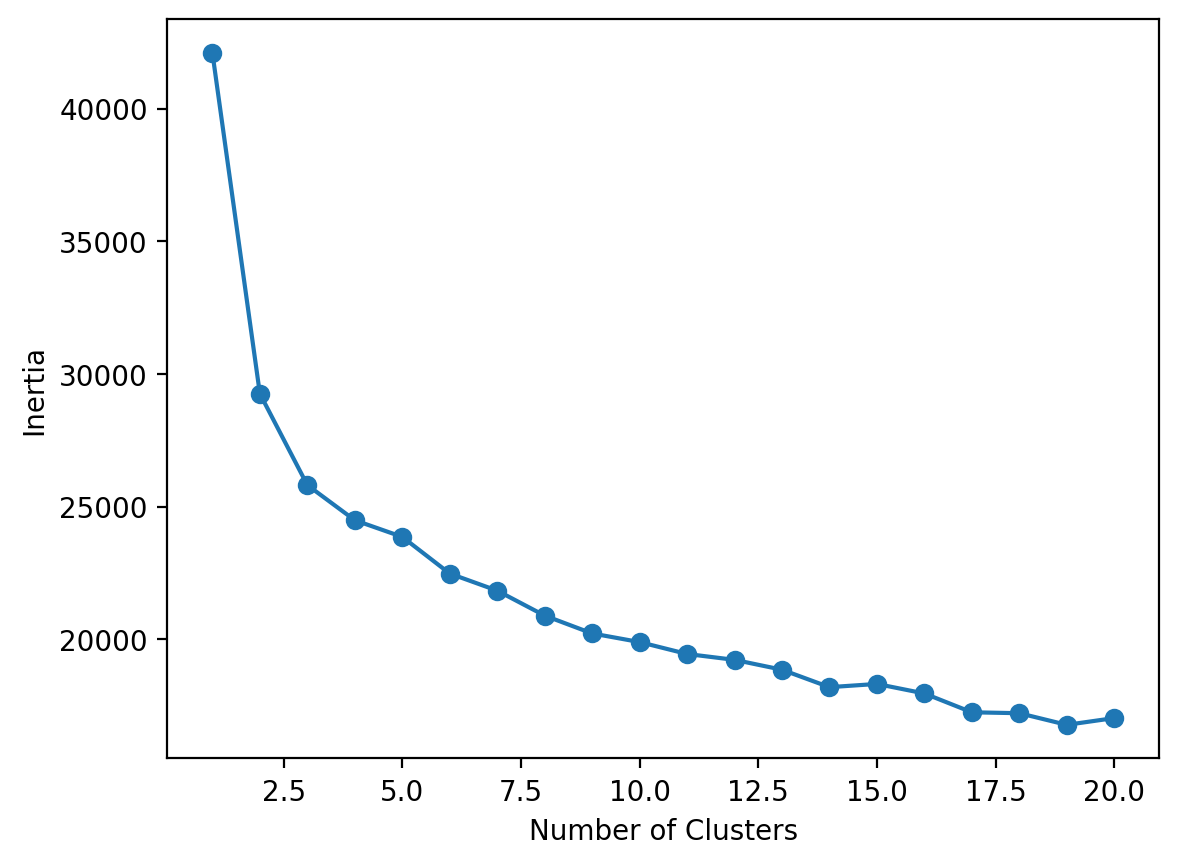

In [197]:
inertia = []
list_num_clusters = list(range(1,21))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

We see that after n_cluster = 4, there is a stiff decrement in the reduction of inertia. This is in line with the number of clusters we found by using the Gaussian Mixture algorithm. We don't want to go behiond 8 cluster, since inertia starts going up and down and there is a risk of overfitting.

In [198]:
#Let's fit the model with the optimal number of clusters
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(data_reduced_90)

KMeans(n_clusters=4)

Let's plot the clusters in 2D.

In [205]:
pca2 = PCA(n_components=2)
reduced_2_PCA = pca2.fit(X).transform(X)
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(reduced_2_PCA)

KMeans(n_clusters=4)

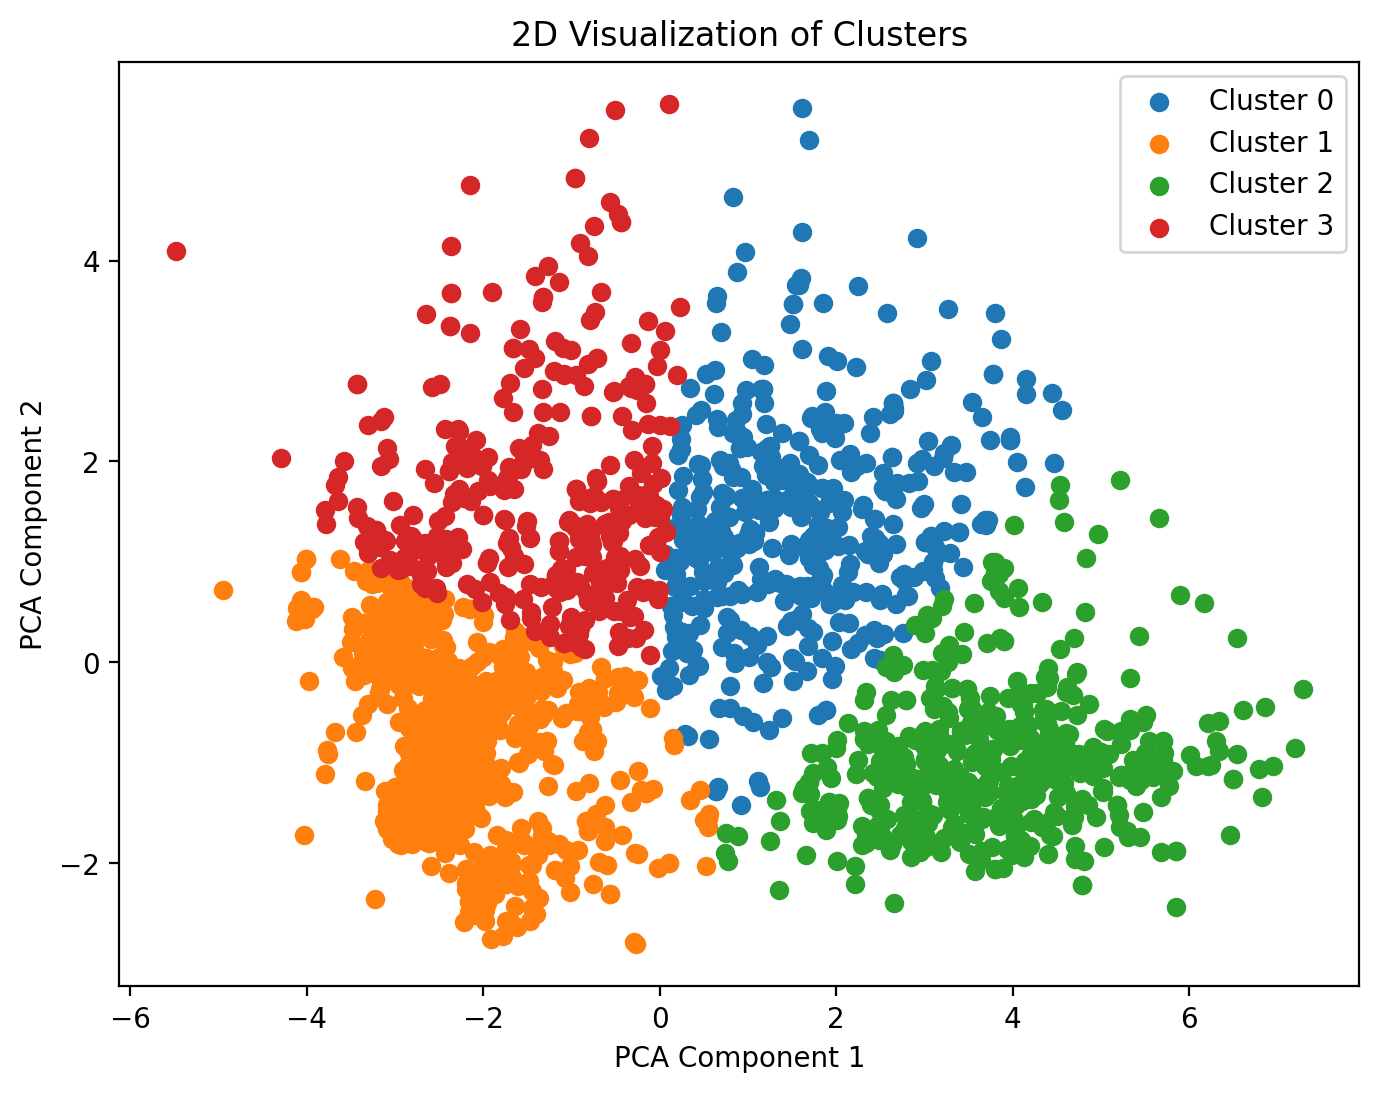

In [206]:
# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(reduced_2_PCA[km.labels_ == i, 0], reduced_2_PCA[km.labels_ == i, 1], label=f'Cluster {i}')

plt.title('2D Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

Two of the clustering obtained by K-Means looks fairly similar to the clusteruing obtained with Gaussian Mixture, but two of them are different. And the clusters produced by Gaussian Mixture are easier to distinguish.

Let's plot the clusters in 3D, by using 3 components.

In [207]:
pca3 = PCA(n_components=3)
reduced_3_PCA = pca3.fit(X).transform(X)
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(reduced_3_PCA)

KMeans(n_clusters=4)

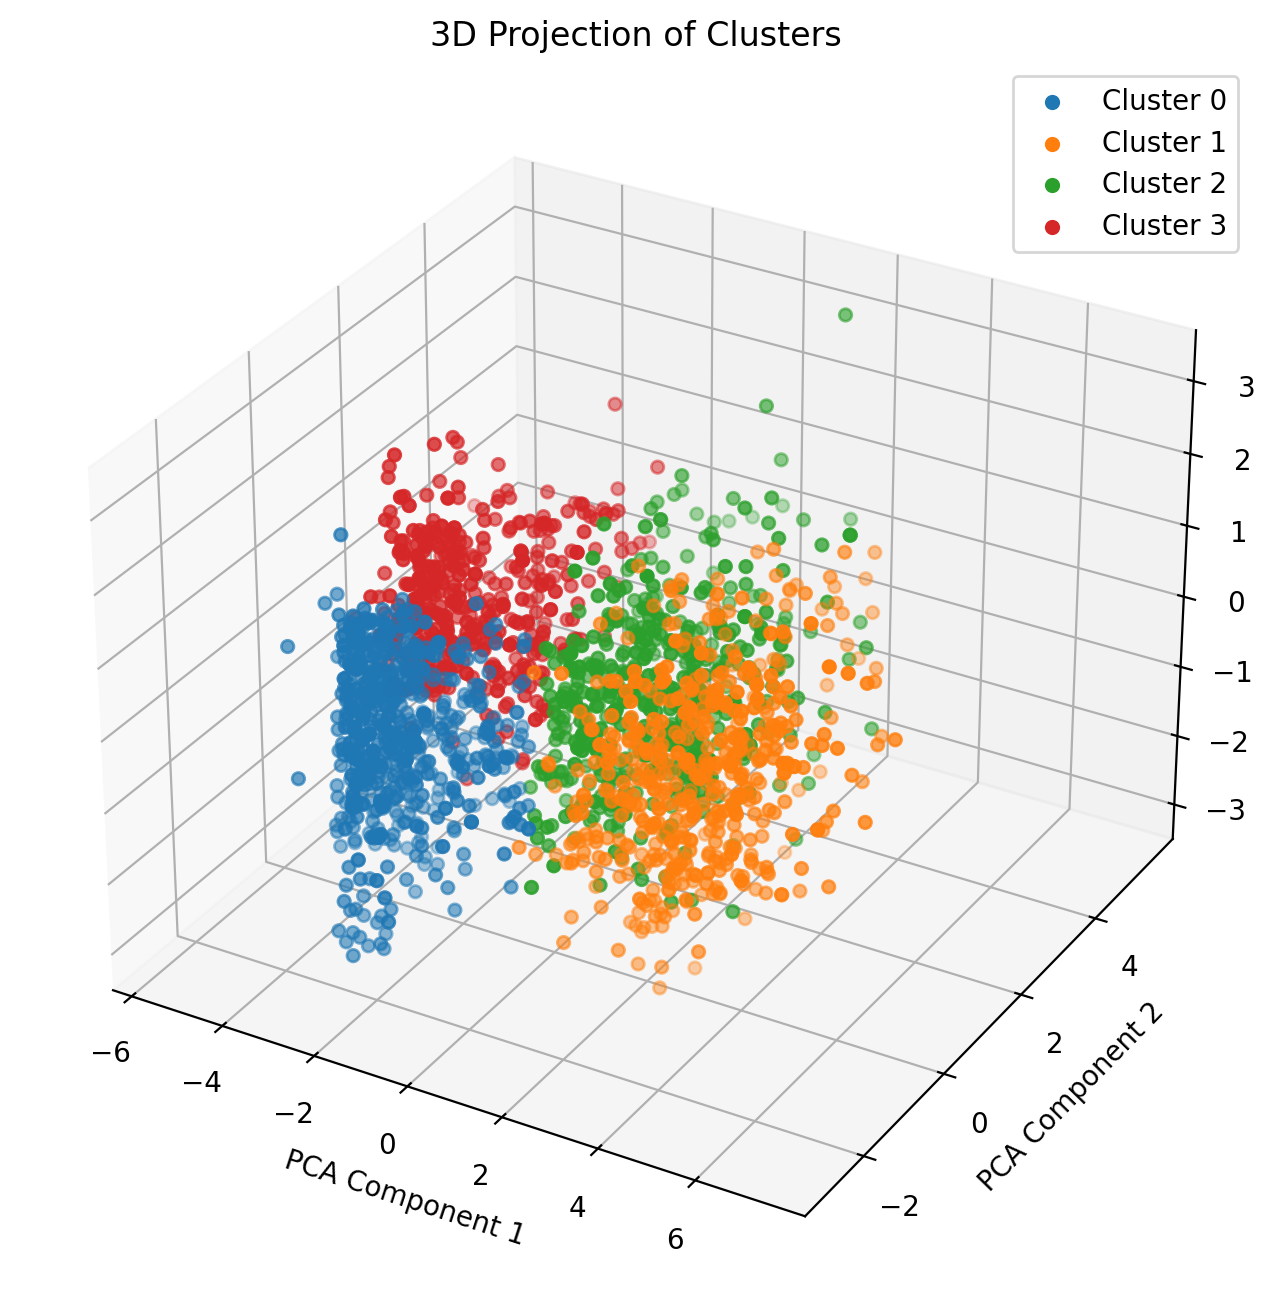

In [208]:
# Plot clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    ax.scatter(reduced_3_PCA[km.labels_ == i, 0], 
               reduced_3_PCA[km.labels_ == i, 1], 
               reduced_3_PCA[km.labels_ == i, 2],
               label=f'Cluster {i}')

ax.set_title('3D Projection of Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()

By plotting in 3D, clusters produced with K-Means look much more similar to the clusters produced by Gaussian Mixture than in the 2D plots. Even if the two models look fairly similar, we will pick the model produced by Gaussian Mixture as our final model.

To improve our model further, we could analyze the relationship between the variables and their distribution. This would enable us to identify variables with stronger correlations and spot potential multicollinearity issues. Additionally, implementing a pipeline could make our code more compact and readable. Another step we could take is to employ more sophisticated dimensionality reduction techniques, such as KernelPCA, to spot nonlinear relationships, and compare their performance to PCA. We could also use GridSearchCV to tune the parameters of the KernelPCA model. However, given that this model has only 19 features, the potential improvement from trying different dimensionality reduction techniques might not be as significant as in datasets with a larger number of features.